In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re


In [34]:
df = pd.read_csv("crash_data.csv")
df.head(10)

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,...,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN
5,1809229,1,NaN,NaN,NaN,NaN,NaN,2405.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1809229,2,3409765.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1809229,3,3409765.0,3888073.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,1809229,3,0.0,3888074.0,2.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,9.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
9,1809637,1,NaN,NaN,NaN,NaN,NaN,1811.0,5.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:

df1_crash = df[df['Record Type'] == 1]
# df1.head(10)
df2_vehicle = df[df['Record Type'] == 2]
# df2_vehicle.head(10)
df3_participant = df[df['Record Type'] == 3]
#join on crash Id to get all records for one crash id

df1_.head(10)


,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,...,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1809229,1,NaN,NaN,NaN,NaN,NaN,2405.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1809637,1,NaN,NaN,NaN,NaN,NaN,1811.0,5.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1810874,1,NaN,NaN,NaN,NaN,NaN,99981.0,4.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1812266,1,NaN,NaN,NaN,NaN,NaN,5970.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1815964,1,NaN,NaN,NaN,NaN,NaN,99980.0,10.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,1816804,1,NaN,NaN,NaN,NaN,NaN,4207.0,11.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,1826266,1,NaN,NaN,NaN,NaN,NaN,110.0,1.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,1826321,1,NaN,NaN,NaN,NaN,NaN,207.0,1.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1826490,1,NaN,NaN,NaN,NaN,NaN,97.0,4.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There were  80  days accidents occured.
508  unique accidents occured.


<AxesSubplot:>

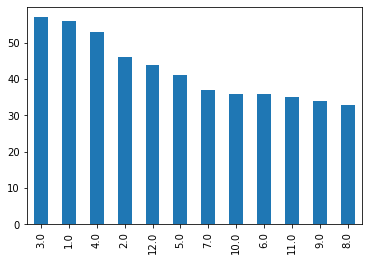

In [40]:
#Statistical: crashes were evenly distributed over months FALSE!!

######################################
####convert three columns into a datetime column
M = df1_crash['Crash Month']
D = df1_crash['Crash Day']
Y = pd.DataFrame(2019, index=range(df1_crash.shape[0]), columns=range(1))
#concatenate, set the names, drop the nan rows.
dates = pd.concat([Y,M,D],axis=1).set_axis(["Y", "M", "D"], axis=1).dropna()
#the *10,000, and *100 move the decimals over so date time has a readable format to use.
dates = pd.to_datetime(dates.Y*10000+dates.M*100+dates.D,format='%Y%m%d')
missing = pd.DataFrame(pd.date_range(start="2019-01-01", end="2019-12-31").difference(dates))
#############################################

num_accident_days = 365 - missing.shape[0]
print("There were ", num_accident_days, " days accidents occured.")
print(df1_crash['Crash ID'].unique().shape[0], " unique accidents occured.")
M.value_counts().plot.bar()

In [57]:
#get the shape(number) of all records and then count months column
#Existence 1: every crash occurred during a month
print(df1_crash.shape[0])

print(df1_crash['Crash Month'].isnull().sum())


508
0


In [68]:
#Existence 2: every crash occurred on HWY 26
# print(df1_crash['Highway Number'].isnull().sum())
if (df1_crash['Highway Number'] == 26).all():
    print("success")

success


In [70]:
#Limit 1: crash month occurred between month 1 and month 12 
date_list = df1['Crash Month'].tolist()
for i in date_list:
    if i > 12 or i < 1:
        print("FAIL")
        break
    else:
#         print("success")
        continue

In [73]:
#Limit 2: every crash occurred in 2019

if(df1_crash['Crash Year'] == 2019).all():
    print("Success")


Success


In [81]:
#IntraRecord: Every vehicle listed in one record share same Crash ID
# join df1_crash and df2_vehicle on crashID
df5 = pd.merge(df1_crash, df2_vehicle, on="Crash ID",how="outer")
df5.head(50)
print((df5['Record Type_y'] == 2).all())

True


In [98]:
#Statistical Distribution 1: alcohol was involved <50% of the time
total = df1_crash.shape[0]
alc = df1_crash[df1_crash['Alcohol-Involved Flag'] == 1].shape[0]
alc_total = (alc / total) * 100
print(alc_total)

8.070866141732283


In [103]:
#Summary: there are less than 1000 crashes
# if(df1_crash.sum)

#InterRecord 1: every crash has a unique crash id
total = df1_crash.shape[0]
unique = df1_crash['Crash ID'].unique().shape[0]
if total == unique:
    print("TRUE")

TRUE


In [113]:
#IntraRecord 1: every vehicle id is associated with one participant id

participants = df3_participant[df3_participant['Participant ID'] != 0].shape[0]
vehicles = df3_participant[df3_participant['Vehicle ID'] != 0].shape[0]

print(participants)
print(vehicles)

if vehicles != participants:
    print ("FALSE")

1216
1192
FALSE


In [110]:
#Summary: there are less than 1000 crashes
if df1_crash.shape[0] < 1000:
    print("SUCCESS")

SUCCESS


In [117]:
#total num crashes
# - unique crashes in particiant table

unique = df3_participant['Crash ID'].unique().shape[0];
print(unique)

508
